# SDMT Validity 

---
## 1. Introduction


The concept of validity was formulated by Kelly (1927, p. 14) who stated that a test is valid if it measures what it claims to measure. For example a test of intelligence should measure intelligence and not something else (such as memory).

#### Who stated that a test is valid if it measures what it claims to measure

For example, the validity of a cognitive test for job performance is the correlation between test scores and, for example, supervisor performance ratings. Such a cognitive test would have predictive validity if the observed correlation were statistically significant.

Rather than accuracy, validity refers to the meaning of a test score. There are multiple aspects of validity in psychometric science. Does a low score, for example, represent the presence of neuropsychological dysfunction, a particular disease state such as MS, a high likelihood of brain atrophy or some other marker of cerebral involvement, or perhaps an increased risk of failing at work? Correlations between test scores and other measures [ie validity coefficient r] and comparing differences in the performance from specified samples [eg, MS vs controls; employed vs disabled MS patients] are common methods of investigation.

The BICAMS committee decided that the most important aspect of validity for clinical purposes is criterion-related validity, most notably differentiating MS patients from healthy controls. All of the BICAMS tests discriminate well with SDMT most often the most sensitive measure in NP batteries

The first step is the standardisation of the test, to ensure that test stimuli and administration procedures have face validity and consistent stimulus presentation. The CSCT is presented on a computer in a consistent manner for each session. The instructions are standardised and they appear on the computer screen. The construction of the test was inspired by other well-known IPS measures, such as the digit-symbol subtests of the WAIS-R,14 the SDMT17 that ensures its face validity

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sys.path.insert(0, '/Users/pedrohserrano/SDMT-Analysis/utils') #internal packages
import buildms as ms 
import statsms as stms
color_ms = '#386cb0' #blue, This is the color chosen for patients with Multiple Sclerosis
color_hc = 'red'#This is the color chosen for health control participants

##### Recommended Step-by-Step Protocol for BICAMS Validation

**Step 1, Standardization and Translation of Test Stimuli**  
For visual stimuli, determine if there are any semantic associations to stimuli in the culture or language under consideration. For CVLT2 must match new words on word frequency and appropriate similarity ofmeaning. If these parameters cannot be applied scientifically, then ex- pert review andperformance on test by appropriate partici- pants will be utilized to assess translation

**Step 2, Standardization and Translation of Test  Instructions**  
All information from the testmanual necessary for administration and interpretation must be translated, back translated,and checked for errors. Where possible the translated instructions should be validated againstexpected participant performance in terms of accuracy and error profile. Step 4 will also contribute to the accuracy of the test instructions 

**Step 3, Normalization**  
Large samples of 150 or more healthy persons are needed for data applicable to persons of all ages and diverse ethnicity. The minimum sample size is 65 healthy volunteers, provided they are group matched on demographics to either a concurrent MS sample, or matched to samples in other published descriptive MS studies. Where possible, the distribution of test scores and error profile of the normalization sample shouldbe examined and compared to published distributions from other language groups

**Step 4, Test-Retest Reliability**  
Assessment of this criterion can be achieved by evaluatingan MS and/or healthy volunteer sample on two occasions separated by 1–3 weeks. This is thegold standard separation where the question is only test reliability, controlling for maturation effects. A Pearson’s correlation coefficient >0.70 will usually be required. 

**Step 5, Criterion-Related Validity**  
This step can be pursued in conjunction with Step 3, inthat an MS sample can be compared to a healthy control group that also serves for normalization. To determine if a new Italian BVMTR is sensitive to MS disease state, for example, compare 50 patients to the healthy controls in Step 3. After the study, the investigator adds another 35 healthy volunteers to round out the normalization sample

Step 1 and 2 = True (The test it is performed in an application on a controled group  
Step 4 = True (The study was driven on the last stories), Step 3= Datapoints count? 246,23
Step 5 = Predictive

--- 
##### Loading Datasets

In [3]:
!python ~/SDMT-Analysis/utils/create_dataset.py ~/SDMT-Analysis/data/processed/mijn-kwik-may.csv

Percetnage of missing values: 26.309124185727793
Max answers: 61
Min score: 7 Max score: 67 Mean score: 45.861979166666664
Percentage of MS in Dataset: 65.0 %
... Dataset df_measures_users.csv created
... Dataset df_measures.csv created
... Dataset df_symbols.csv created


In [4]:
df_measures = pd.read_csv('~/SDMT-Analysis/data/interim/df_measures.csv', encoding="utf-8")

In [5]:
df_measures_users = pd.read_csv('~/SDMT-Analysis/data/interim/df_measures_users.csv', encoding="utf-8")

---
## 2. Methods

In order to prove validity, we need to be able to predict who is an MS person

##### Predictive validity
This is the degree to which a test accurately predicts a criterion that will occur in the future. For example, a prediction may be made on the basis of a new intelligence test, that high scorers at age 12 will be more likely to obtain university degrees several years later. If the prediction is born out then the test has predictive validity.

### 2.1 Predict MS Via Classification

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import cross_val_score

/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We choose 3 different features that help to distinguish an MS person
   - Score of Correct Answers
   - Number of Distraction Points
   - Median Time of Response in Miliseconds

In [7]:
X = df_measures[['correct.answers','distract_points','response_ms_med']]
y = df_measures['ms']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=4)

In [9]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(metrics.classification_report(y_test, clf.predict(X_test)))
print('Accuracy: {}'.format(round(clf.score(X_test, y_test),2)))

             precision    recall  f1-score   support

        0.0       0.82      0.38      0.51        24
        1.0       0.79      0.97      0.87        58

avg / total       0.80      0.79      0.76        82

Accuracy: 0.79


In [10]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print(metrics.classification_report(y_test, clf.predict(X_test)))
print('Accuracy: {}'.format(round(clf.score(X_test, y_test),2)))

             precision    recall  f1-score   support

        0.0       0.64      0.67      0.65        24
        1.0       0.86      0.84      0.85        58

avg / total       0.80      0.79      0.79        82

Accuracy: 0.79


In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(metrics.classification_report(y_test, clf.predict(X_test)))
print('Accuracy: {}'.format(round(clf.score(X_test, y_test),2)))

             precision    recall  f1-score   support

        0.0       0.92      0.50      0.65        24
        1.0       0.83      0.98      0.90        58

avg / total       0.85      0.84      0.82        82

Accuracy: 0.84


ROC AUC: 0.8024425287356323


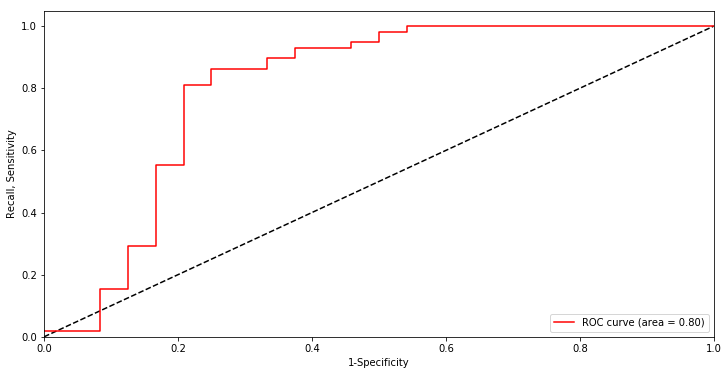

In [12]:
plt.figure(figsize=(12, 6))
plt.plot([0, 1], [0, 1], 'k--'); plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
print ('ROC AUC: {}'.format(roc_auc))

plt.xlabel('1-Specificity')
plt.ylabel('Recall, Sensitivity')
plt.legend(loc="lower right")
plt.savefig('../reports/roc_logistic.png')

### 2.2 Scores Point Estimate

In [13]:
## MS Person
import scipy.stats as stats
score_variable = 'correct.answers'

In [14]:
df_ms = df_measures[df_measures['ms']==1][['userId','correct.answers','ms']]
ms_norm = stats.norm(df_ms[score_variable].mean(), df_ms[score_variable].std())
ms_sample = ms_norm.rvs(10000)

df_hc = df_measures[df_measures['ms']==0][['userId','correct.answers','ms']]
hc_norm = stats.norm(df_hc[score_variable].mean(), df_hc[score_variable].std())
hc_sample = hc_norm.rvs(10000)

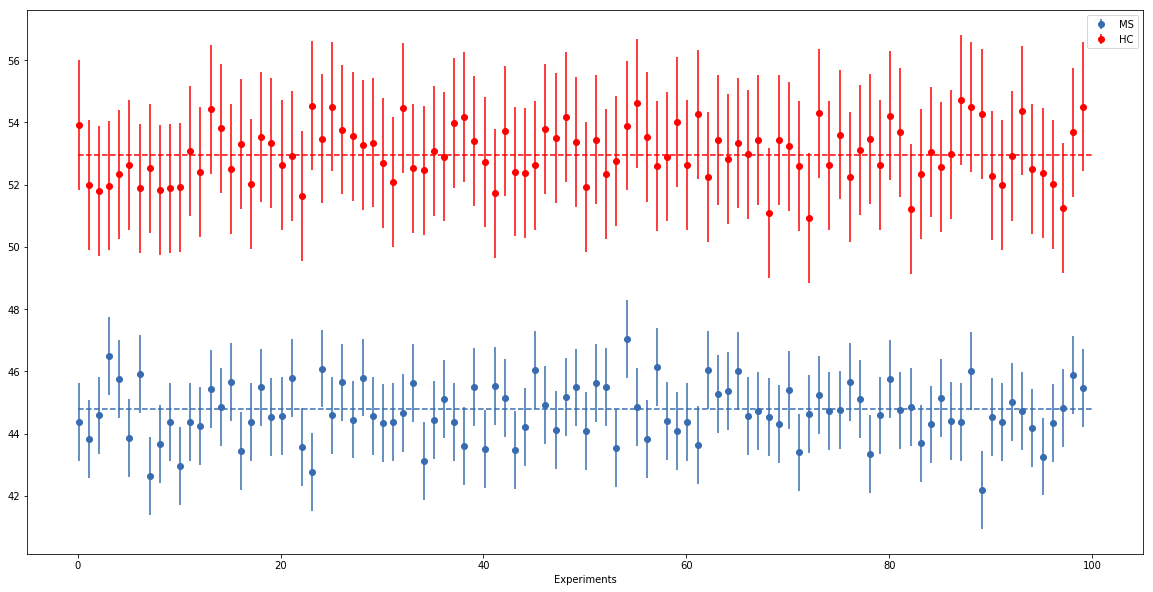

In [15]:
fig = plt.figure(figsize=(20,10))
N=100 #number of elements randomly grab with replacement
M=100 #number of bootsraps

means, intervals = stms.Intervals(df_ms[score_variable]).create_int(N,M) #ms_sample)
plt.errorbar(x=np.arange(0.1, M, 1), y=means, yerr=[(top-bot)/2 for top,bot in intervals], 
             color=color_ms,fmt='o', label='MS')
plt.hlines(xmin=0, xmax=M, y=df_ms[score_variable].mean(), color=color_ms, linestyles='--')

means, intervals = stms.Intervals(df_hc[score_variable]).create_int(N,M) #hc_sample)
plt.errorbar(x=np.arange(0.1, M, 1), y=means, yerr=[(top-bot)/2 for top,bot in intervals], 
             color=color_hc,fmt='o', label='HC')
plt.hlines(xmin=0, xmax=M, y=df_hc[score_variable].mean(), color=color_hc, linestyles='--')

plt.xlabel('Score Inference')
plt.xlabel('Experiments')
plt.legend(loc='best')

We found a person needs 16 trials to find out wich group represent its score, MS or HC

In [16]:
#Run a Bootstrap with 100 Experiments
print('Point estimator on 10k Norms: \n MS: {} (SD {}) \n HC: {} (SD {}) \n Tradeoff: {}'.format(
ms_sample.mean(), ms_sample.std(), hc_sample.mean(), hc_sample.std(), (ms_sample.mean()+hc_sample.mean())/2)) 

Point estimator on 10k Norms: 
 MS: 44.66809967373095 (SD 8.543801491489926) 
 HC: 52.76140373548188 (SD 8.658249054191627) 
 Tradeoff: 48.714751704606414


In [17]:
imp_value = (ms_sample.mean()+hc_sample.mean())/2
impairment = df_measures[df_measures[score_variable] < imp_value]
not_imp = df_measures[df_measures[score_variable] >= imp_value]

In [18]:
#True Positives
tp = impairment['ms'].sum()
tn = len(not_imp) - not_imp['ms'].sum()
fn = not_imp['ms'].sum()
fp = len(impairment) - impairment['ms'].sum()

In [19]:
accu = (tp+tn)/len(df_measures)
sens = tp/(tp+fn)
spec = tn/ (tn+fp)
print('Performance: \n Accuracy: {} \n Sensitivity: {} \n Specificity: {}'.format(
    round(accu,2), round(sens,2), round(spec,2) ))

Performance: 
 Accuracy: 0.67 
 Sensitivity: 0.66 
 Specificity: 0.69


Point estimate still not that good as classification methods

---
## 3. Results

|Source|Accuracy | Specificity | Sensitivity |
|:---:|:---:|:---:|:---:|
|Akbar 2011 | 0.78 | 0.84 | 0.71 |
|Ruet 2013 | 0.77 | 0.85 | 0.60  | 
|Van Schependom 2014 | NA | 0.60 | 0.91 |
|**Orikami**|
|Inference|0.67|0.69|0.66|
|k-NN|0.79|0.80|0.79|
|Naive Bayes|0.79|0.80|0.79|
|Logistic|0.84|0.85|0.84|


The general performance is acceptable, and at some point better than the references, tryying more type of validity is going to make clear the complete validity of the test

The next steps should be try concurrent validity correlating scores on MS people with impairment data, job information or fMRI results